In [1]:
import trainer as t

Using TensorFlow backend.


In [20]:
from importlib import reload
reload(t)

<module 'trainer' from '/Users/paulm/code/web-traffic-time-series-forecasting/trainer.py'>

# DataSet

In [2]:
d = t.DataSet()

In [3]:
d.num_keys()

145063

In [4]:
rindex = 144278

In [5]:
d.process_index(rindex, 20, 10)

In [6]:
d.x.shape, d.y.shape

((520, 20, 1), (520, 10))

In [7]:
d.npdata.shape

(550,)

# Model

In [8]:
ctx = t.train_model(d, max=64, epochs=10)

In [9]:
import pandas as pd
%matplotlib inline
figsize=(20,4)
def plot_loss(ctx):
    print(ctx.train_time)
    pd.DataFrame({"loss": ctx.history['loss']}).plot(figsize=figsize)

10.673203491955064


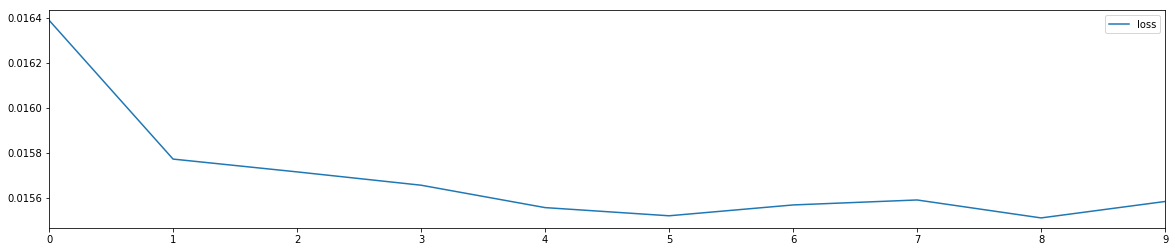

In [10]:
plot_loss(ctx)

In [11]:
ctx.save()

In [12]:
%ls models

o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010.pkl
o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010_weights.h5


In [13]:
ctx = t.TrainContext.load(20, 10, 0, 64, 64, 1, 1e-3, 10)

In [14]:
ctx.model.predict(d.last_obs())

array([[ 0.05544426,  0.06174608,  0.05406587,  0.05705758,  0.05769273,
         0.07146811,  0.06140314,  0.07082212,  0.06048554,  0.06210319]], dtype=float32)

## Retrain

In [16]:
ctx.train(d, lr=1e-3, epochs=4, max=2, verbose=1)

Epoch 1/4
2/2 [==============================] - 0s - loss: 5.0329e-04     
Epoch 2/4
2/2 [==============================] - 0s - loss: 4.8623e-04     
Epoch 3/4
2/2 [==============================] - 0s - loss: 4.7312e-04     
Epoch 4/4
2/2 [==============================] - 0s - loss: 4.8206e-04     


0.12982848496176302


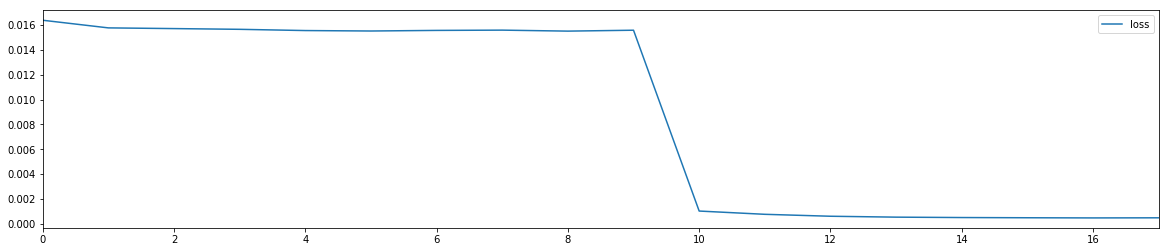

In [17]:
plot_loss(ctx)

# How long to do a real one?

In [20]:
d = t.DataSet()

In [21]:
d.process_index(rindex, 120, 60)

In [22]:
d.x.shape, d.y.shape

((370, 120, 1), (370, 60))

In [23]:
ctx = t.train_model(d, units=128, cells=2, epochs=8, verbose=True)

Epoch 1/8
370/370 [==============================] - 67s - loss: 0.0044    
Epoch 2/8
370/370 [==============================] - 67s - loss: 0.0043    
Epoch 3/8
370/370 [==============================] - 67s - loss: 0.0042    
Epoch 4/8
370/370 [==============================] - 67s - loss: 0.0042    
Epoch 5/8
370/370 [==============================] - 67s - loss: 0.0042    
Epoch 6/8
370/370 [==============================] - 67s - loss: 0.0042    
Epoch 7/8
370/370 [==============================] - 67s - loss: 0.0042    
Epoch 8/8
370/370 [==============================] - 67s - loss: 0.0042    


538.2772341830423


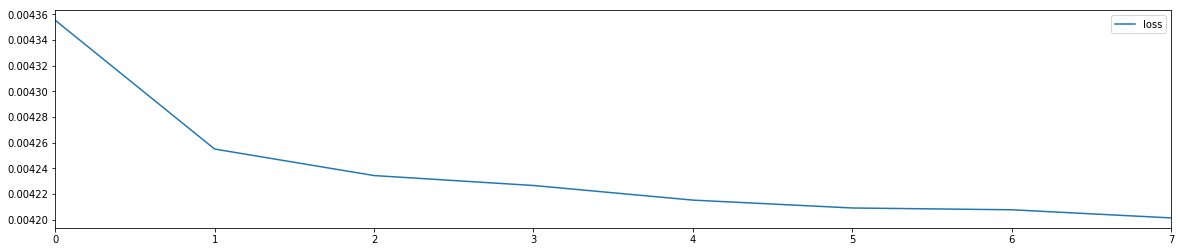

In [24]:
plot_loss(ctx)

In [25]:
ctx.save()

In [26]:
%ls models

o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010.pkl
o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010_weights.h5
o0120_p0060_m0000_M0370_u128_c002_lr1.000000e-03_e0008.pkl
o0120_p0060_m0000_M0370_u128_c002_lr1.000000e-03_e0008_weights.h5


In [29]:
ctx = t.TrainContext.load(120, 60, 0, 370, 128, 2, 1e-3, 8)

In [30]:
ctx.train(d, lr=5e-3, epochs=4, verbose=True)

Epoch 1/4
370/370 [==============================] - 66s - loss: 0.0044    
Epoch 2/4
370/370 [==============================] - 65s - loss: 0.0044    
Epoch 3/4
370/370 [==============================] - 65s - loss: 0.0043    
Epoch 4/4
370/370 [==============================] - 65s - loss: 0.0043    


264.6748600709834


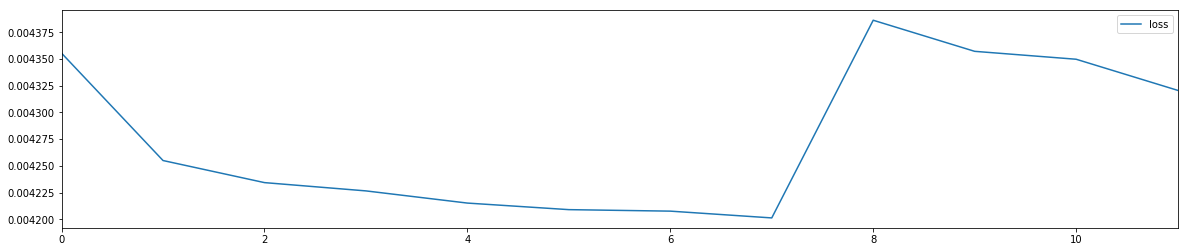

In [31]:
plot_loss(ctx)

In [32]:
ctx.train(d, lr=5e-3, epochs=2, verbose=True)

Epoch 1/2
370/370 [==============================] - 65s - loss: 0.0043    
Epoch 2/2
370/370 [==============================] - 65s - loss: 0.0043    


130.90982087602606


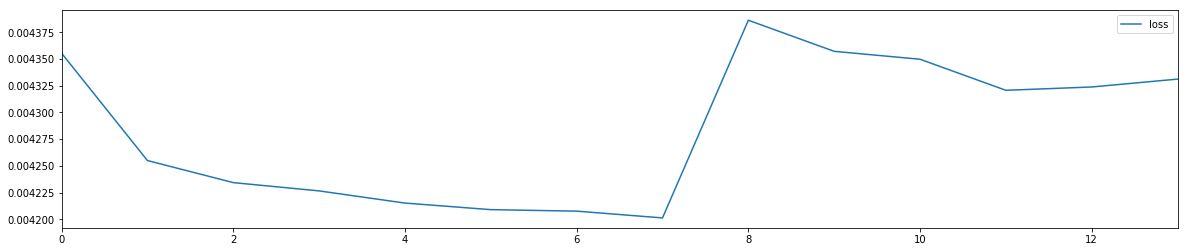

In [33]:
plot_loss(ctx)

In [34]:
ctx = t.TrainContext.load(120, 60, 0, 370, 128, 2, 1e-3, 8)

In [35]:
ctx.train(d, lr=1e-3, epochs=2, verbose=True)

Epoch 1/2
370/370 [==============================] - 65s - loss: 0.0042    
Epoch 2/2
370/370 [==============================] - 65s - loss: 0.0042    


131.58275012101512


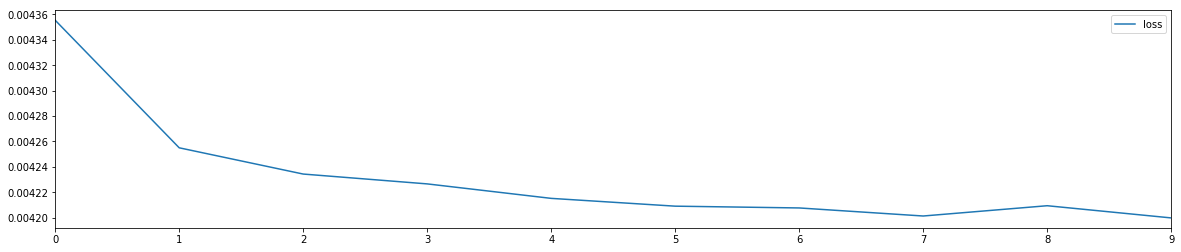

In [36]:
plot_loss(ctx)

In [37]:
%ls models

o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010.pkl
o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010_weights.h5
o0120_p0060_m0000_M0370_u128_c002_lr1.000000e-03_e0008.pkl
o0120_p0060_m0000_M0370_u128_c002_lr1.000000e-03_e0008_weights.h5


In [39]:
ctx.save()

In [40]:
%ls models

2017-09-06_07:50:04.097107.pkl
2017-09-06_07:50:04.097107_weights.h5
o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010.pkl
o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010_weights.h5
o0120_p0060_m0000_M0370_u128_c002_lr1.000000e-03_e0008.pkl
o0120_p0060_m0000_M0370_u128_c002_lr1.000000e-03_e0008_weights.h5
